
Statistics for 50m(f):
  Peak 1:
    Maximum Location: (38.78787878787879, 1.1377144650629583)
    Std: 0.1623
    Mean: 0.9407
    Mean Location: 38.9136
    Median Location: 39.3182
    Distance from Max to Mean: -0.1258
    Distance from Mean to Median: -0.4046
  Std from Max to Mean: 0.0752
  Std from Mean to Median: 0.4551
  Peak 2:
    Maximum Location: (89.69696969696969, 0.4674484658722345)
    Std: 0.0113
    Mean: 0.4550
    Mean Location: 89.6724
    Median Location: 89.1667
    Distance from Max to Mean: 0.0246
    Distance from Mean to Median: 0.5057
  Std from Max to Mean: 0.0752
  Std from Mean to Median: 0.4551

Statistics for 100m(f):
  Peak 1:
    Maximum Location: (40.90909090909091, 1.9258336936707794)
    Std: 0.1326
    Mean: 1.7713
    Mean Location: 40.8686
    Median Location: 40.3788
    Distance from Max to Mean: 0.0405
    Distance from Mean to Median: 0.4898
  Std from Max to Mean: 0.0250
  Std from Mean to Median: 0.5053
  Peak 2:
    Maximum Location: (8

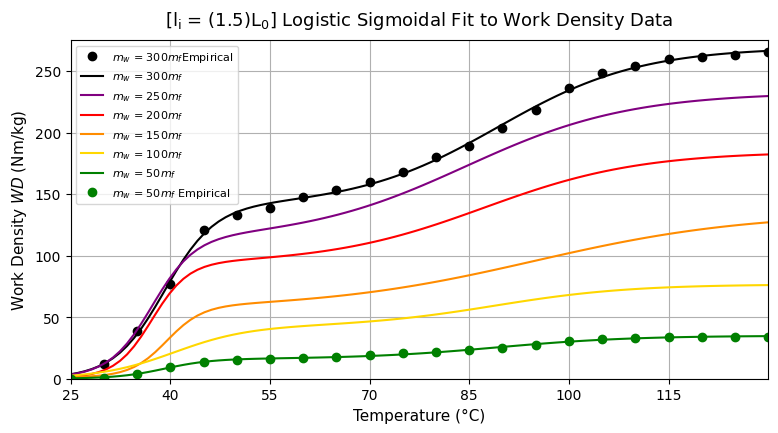

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from sklearn.metrics import r2_score

# 1. User datasets:
x_data = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 
110, 115, 120, 125, 130])
y_data50 = np.array([0, 0.50031, 4.00248, 9.50589, 13.50837, 15.0093, 16.00992, 17.01054, 
18.01116, 19.01178, 20.51271, 21.51333, 23.01426, 25.0155, 27.51705, 30.51891, 32.52015, 
33.270615, 33.770925, 33.770925, 34.02108, 34.271235]) 
y_data100 = np.array([0, 4.95405, 12.88053, 20.80701, 28.73349, 36.65997, 39.6324, 
42.109425, 44.58645, 47.55888, 50.035905, 52.51293, 55.48536, 59.4486, 63.41184, 68.36589, 
72.32913, 73.31994, 74.31075, 75.30156, 75.30156, 75.30156])
y_data150 = np.array([0, 2.96262, 8.88786, 35.55144, 51.84585, 57.77109, 62.21502, 65.17764, 
68.14026, 72.58419, 75.54681, 79.250085, 83.694015, 88.8786, 94.063185, 99.24777, 
107.394975, 115.54218, 119.98611, 122.94873, 124.43004, 124.43004])
y_data200 = np.array([0, 5.91543, 29.57715, 70.98516, 88.73145, 92.67507, 98.5905, 
102.53412, 108.44955, 112.39317, 118.3086, 126.19584, 132.11127, 139.99851, 151.82937, 
161.68842, 173.51928, 175.49109, 177.4629, 179.43471, 179.43471, 179.43471])
y_data250 = np.array([0, 12.31155, 39.39696, 83.71854, 105.87933, 115.72857, 120.65319, 
128.04012, 135.42705, 142.81398, 152.66322, 162.51246, 169.89939, 182.21094, 194.52249, 
206.83404, 219.14559, 221.6079, 224.07021, 226.53252, 226.53252, 226.53252])
y_data300 = np.array([0, 11.81124, 38.38653, 76.77306, 121.06521, 132.87645, 138.78207, 
147.6405, 153.54612, 159.45174, 168.31017, 180.12141, 188.97984, 203.74389, 218.50794, 
236.2248, 248.03604, 253.94166, 259.84728, 261.323685, 262.80009, 265.7529])


# 2a. Sigmoid function definition:
def compound_sigmoid(x, U1, x01, k1, U2, x02, k2):
    return U1 / (1 + np.exp(-k1 * (x - x01))) + U2 / (1 + np.exp(-k2 * (x - x02)))

# 2b. Derivative of sigmoid function:
def compound_sigmoid_derivative(x, U1, x01, k1, U2, x02, k2):
    sig1 = (U1 * k1 * np.exp(-k1 * (x - x01))) / ((1 + np.exp(-k1 * (x - x01))) ** 2)
    sig2 = (U2 * k2 * np.exp(-k2 * (x - x02))) / ((1 + np.exp(-k2 * (x - x02))) ** 2)
    return sig1 + sig2 

# 3. Sigmoid x-fit defined:  
x_fit = np.linspace(25, 130, 100) 

# 4. Initial guesses for calculating fitting parameters: 
#---------------------------------------------------------------
# (A-1.) [PERSONAL/EACH] >WORK DENSITY< Initial Guesses
p0_50 = [max(y_data50)/2, 38, 0.1, max(y_data50), 65, 0.1] 
p0_100 = [max(y_data100)/2, 38, 0.1, max(y_data100), 65, 0.1] 
p0_150 = [max(y_data150)/2, 38, 0.1, max(y_data150), 65, 0.1] 
p0_200 = [max(y_data200)/2, 38, 0.1, max(y_data200), 65, 0.1] 
p0_250 = [max(y_data250)/2, 38, 0.1, max(y_data250), 65, 0.1] 
p0_300 = [max(y_data300)/2, 38, 0.1, max(y_data300), 65, 0.1] 

# 5. Optimization parameters for ROI-specific calculation of the parameters: 
bounds = (0, [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])

# 6. Fitting the data according to the initial guesses and the compound sigmoid function: 
popt_50, _ = curve_fit(compound_sigmoid, x_data, y_data50, p0_50, bounds=bounds, maxfev = 
5000)
popt_100, _ = curve_fit(compound_sigmoid, x_data, y_data100, p0_100, bounds=bounds, maxfev = 
5000)
popt_150, _ = curve_fit(compound_sigmoid, x_data, y_data150, p0_150, bounds=bounds, maxfev = 
5000)
popt_200, _ = curve_fit(compound_sigmoid, x_data, y_data200, p0_200, bounds=bounds, maxfev = 
5000)
popt_250, _ = curve_fit(compound_sigmoid, x_data, y_data250, p0_250, bounds=bounds, maxfev = 
5000)
popt_300, _ = curve_fit(compound_sigmoid, x_data, y_data300, p0_300, bounds=bounds, maxfev = 
5000) 

# 7a. Calculation of the y-value compound sigmoid fit data per data set: 
y_fit50 = compound_sigmoid(x_fit, *popt_50)
y_fit100 = compound_sigmoid(x_fit, *popt_100)
y_fit150 = compound_sigmoid(x_fit, *popt_150)
y_fit200 = compound_sigmoid(x_fit, *popt_200)
y_fit250 = compound_sigmoid(x_fit, *popt_250)
y_fit300 = compound_sigmoid(x_fit, *popt_300)

# 7b. Calculation of the derivative series' y-values from the theoretical compound sigmoid: 
dy_dx_fit50 = compound_sigmoid_derivative(x_fit, *popt_50)
dy_dx_fit100 = compound_sigmoid_derivative(x_fit, *popt_100)
dy_dx_fit150 = compound_sigmoid_derivative(x_fit, *popt_150)
dy_dx_fit200 = compound_sigmoid_derivative(x_fit, *popt_200)
dy_dx_fit250 = compound_sigmoid_derivative(x_fit, *popt_250)
dy_dx_fit300 = compound_sigmoid_derivative(x_fit, *popt_300) 

# 8. Locating the peaks within the theoretical derivative plots (x-axis values): 
peaks50, _ = find_peaks(dy_dx_fit50)
peaks100, _ = find_peaks(dy_dx_fit100)  
peaks150, _ = find_peaks(dy_dx_fit150)
peaks200, _ = find_peaks(dy_dx_fit200)
peaks250, _ = find_peaks(dy_dx_fit250)
peaks300, _ = find_peaks(dy_dx_fit300)

# 9. Statistical parameter calculation functions according to peak distinction indices: 
def calculate_statistics(x, y):
    std = np.std(y)
    mean = np.mean(y)
    mean_location = np.sum(x * y) / np.sum(y) #-here, indices are based on distribution  values. Only second half of sorted indices given.
    median_location = np.median(x[np.argsort(y)[len(y) // 2:]]) #-the median of the second  half sorted is calculated. This is better for skewed distributions.
    return std, mean, mean_location, median_location

# 9a. Define a the maxima, distinguishing local and absolute. 
def find_maxima(x, y):
    peaks, _ = find_peaks(y)
    maxima = [(x[p], y[p]) for p in peaks]
    absolute_maximum = (x[np.argmax(y)], np.max(y))
    return maxima, absolute_maximum

# 9b. Calculation and printing of the statistical parameters' values according to bounds: 
def calculate_local_statistics(x, y, peak_indices, window_size = 5):
    statistics = []
    for peak in peak_indices:
        start = max(0, peak - window_size)
        end = min(len(x), peak + window_size + 1)
        x_local = x[start:end]
        y_local = y[start:end]
        std, mean, mean_location, median_location = calculate_statistics(x_local, y_local)

# 9d. Position of the maximum is found within localized metrics: 
        max_location = x_local[np.argmax(y_local)] 

# 9e. The distances [max. position - mean position] and [mean position - median position] 
        distance_max_to_mean = max_location - mean_location
        distance_mean_to_median = mean_location - median_location

        statistics.append((std, mean, mean_location, median_location, distance_max_to_mean, distance_mean_to_median))

    return statistics

#9f. Datasets referenced for individual parameters: 
datasets = [
    ('50m(f)', dy_dx_fit50),
    ('100m(f)', dy_dx_fit100),
    ('150m(f)', dy_dx_fit150),
    ('200m(f)', dy_dx_fit200),
    ('250m(f)', dy_dx_fit250),
    ('300m(f)', dy_dx_fit300)
]

# 10a. Local calculation of all statistics done for the listed datasets: 
for label, dy_dx_fit in datasets:
    maxima, absolute_maximum = find_maxima(x_fit, dy_dx_fit)
    peak_indices = [np.where(x_fit == m[0])[0][0] for m in maxima]
    local_stats = calculate_local_statistics(x_fit, dy_dx_fit, peak_indices)
    
# 10b. Standard deviations are computed for the distances found for the peak crest parameters: 
    distances_max_to_mean = [stat[4] for stat in local_stats]
    distances_mean_to_median = [stat[5] for stat in local_stats]

    std_max_to_mean = np.std(distances_max_to_mean)
    std_mean_to_median = np.std(distances_mean_to_median)

# 10c. Statistical parameters are printed 
    print(f"\nStatistics for {label}:") 
    for i, ((x_peak, y_peak), (std, mean, mean_location, median_location, distance_max_to_mean, distance_mean_to_median)) in enumerate(zip(maxima, local_stats)):
        print(f"  Peak {i+1}:")
        print(f"    Maximum Location: ({x_peak}, {y_peak})")
        print(f"    Std: {std:.4f}")
        print(f"    Mean: {mean:.4f}")
        print(f"    Mean Location: {mean_location:.4f}")
        print(f"    Median Location: {median_location:.4f}")
        print(f"    Distance from Max to Mean: {distance_max_to_mean:.4f}")
        print(f"    Distance from Mean to Median: {distance_mean_to_median:.4f}")
        print(f"  Std from Max to Mean: {std_max_to_mean:.4f}")
        print(f"  Std from Mean to Median: {std_mean_to_median:.4f}")

# 11. Plot data, logistic sigmoid function fit & the derivative: 

# 11a. Figures dimensions adjustment: 
plt.figure(figsize = (9, 10))
plt.subplots_adjust(hspace=0.275)

# 11b. Datas' & Sigmoid Fits' series to be plotted in the 1st subplot: 
plt.subplot(2, 1, 1) 

plt.plot(x_data, y_data300, 'o', color = 'black', label = f'$m_{"w"}$ = $300m_{"f"}$' + 'Empirical') 
plt.plot(x_fit, y_fit300, '-', color = 'black', label=f'$m_{"w"}$ = $300m_{"f"}$') 
plt.plot(x_fit, y_fit250, '-', color = 'purple', label=f'$m_{"w"}$ = $250m_{"f"}$')
plt.plot(x_fit, y_fit200, '-', color = 'red', label=f'$m_{"w"}$ = $200m_{"f"}$') 
plt.plot(x_fit, y_fit150, '-', color = 'darkorange', label=f'$m_{"w"}$ = $150m_{"f"}$') 
plt.plot(x_fit, y_fit100, '-', color = 'gold', label=f'$m_{"w"}$ = $100m_{"f"}$')
plt.plot(x_fit, y_fit50, '-', color = 'green', label=f'$m_{"w"}$ = $50m_{"f"}$') 
plt.plot(x_data, y_data50, 'o', color = 'green', label = f'$m_{"w"}$ = $50m_{"f"}$' + ' Empirical') 

# 11c. Work Density Title [Stretched]: >USER SELECTION REQUIRED< 
plt.xlabel('Temperature (°C)', size = 11, y = 0.97) 
plt.xlim((25, 130)) 
plt.ylim((0, 275)) #- Suitable for presenting Stretched. 
plt.xticks(np.arange(25, 130, 15.0))
plt.ylabel('Work Density ' + '$\it{WD}$ ' + '(Nm/kg)', size = 11, x = 1.02)
plt.title('$\mathregular{[l_{i}}$ = $\mathregular{(1.5)L_{0}]}$ '+ 'Logistic Sigmoidal Fit to Work Density Data', size = 13, y = 1.02) 
plt.legend(prop = {"size": 8}) 
plt.grid(True) 

https://stackoverflow.com/questions/78684720/troubleshooting-code-calculate-the-differences-between-mean-max-and-mean-median

In [2]:
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt
from scipy import optimize, signal

In [3]:
y_data = np.stack([
  y_data50, y_data100, y_data150, y_data200, y_data250, y_data300
]).T

In [4]:
y_fit = np.stack([
  y_fit50, y_fit100, y_fit150, y_fit200, y_fit250, y_fit300
]).T

In [5]:
y_dfit = np.stack([
  dy_dx_fit50, dy_dx_fit100, dy_dx_fit150, dy_dx_fit200, dy_dx_fit250, dy_dx_fit300
]).T

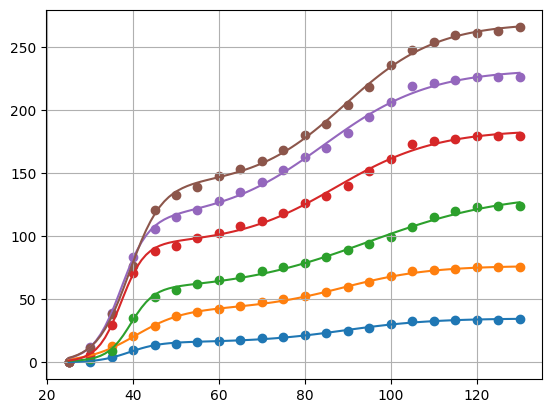

In [6]:
fig, axe = plt.subplots()
for y in y_data.T:
    axe.scatter(x_data, y)
axe.plot(x_fit, y_fit)
axe.grid()

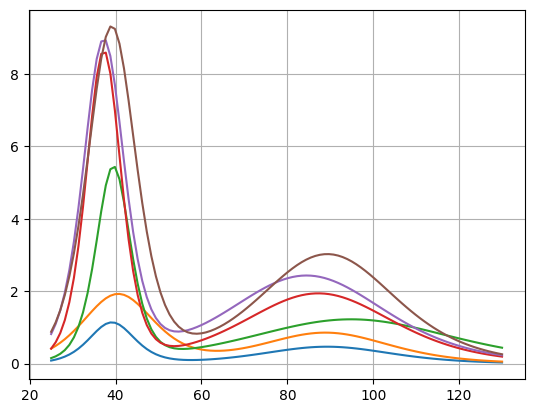

In [7]:
fig, axe = plt.subplots()
axe.plot(x_fit, y_dfit)
axe.grid()